**Machine Learning Models for Regression, KNN, and Bayesian Classification**

This code demonstrates multiple machine learning techniques, including regression analysis (Linear, Polynomial, and Gaussian Kernel Regression), K-Nearest Neighbors (KNN) classification with confusion matrix plotting for different K values, and Bayesian classification using Gaussian parameters for a test point. The models are applied to the diabetes and breast cancer datasets, and visualizations are provided for evaluation metrics and classification distributions.

In [ ]:

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print("Linear Regression MSE:", linear_mse)


# Polynomial Regression
poly_features = PolynomialFeatures(degree=2) #I choosed the degree 2
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_pred)
print("Polynomial Regression MSE:", poly_mse)


# Gaussian Kernel Regression
svr_model = SVR(kernel='rbf', C=100, gamma=0.2)
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
print("Gaussian Kernel Regression MSE:", svr_mse)

Linear Regression MSE: 2900.193628493482
Polynomial Regression MSE: 3096.028307344254
Gaussian Kernel Regression MSE: 3262.6782658716984


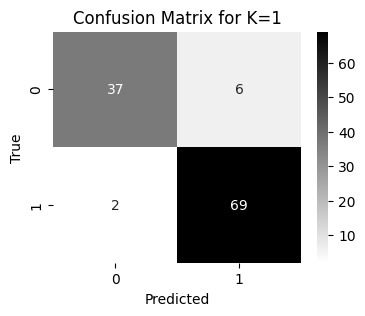

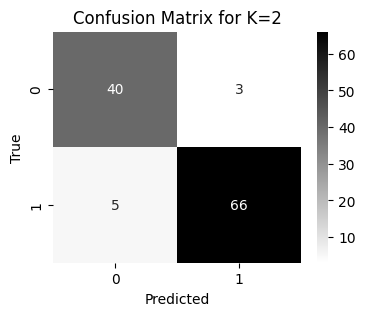

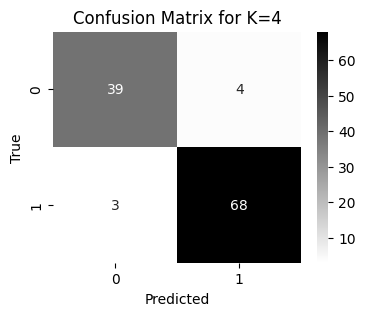

K = 1:
Precision: 0.9200
Accuracy: 0.9298
F1 Score: 0.9452
Recall: 0.9718
******************************
K = 2:
Precision: 0.9565
Accuracy: 0.9298
F1 Score: 0.9429
Recall: 0.9296
******************************
K = 4:
Precision: 0.9444
Accuracy: 0.9386
F1 Score: 0.9510
Recall: 0.9577
******************************


In [ ]:
#2
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Firstly initialize all lists
k_values = [1, 2, 4]  #The k values
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Iterating for different K values
for k in k_values:
    # Create KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


    y_pre = knn.predict(X_test)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_test, y_pre)
    precision = precision_score(y_test, y_pre)
    recall = recall_score(y_test, y_pre)
    f1 = f1_score(y_test, y_pre)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Plot confusion matrix
    conf_mat = confusion_matrix(y_test, y_pre)
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_mat, annot=True, cmap='binary', fmt='g')
    plt.title(f'Confusion Matrix for K={k}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Displaying evaluation metrics
for i, k in enumerate(k_values):
    print(f"K = {k}:")
    print(f"Precision: {precisions[i]:.4f}")
    print(f"Accuracy: {accuracies[i]:.4f}")
    print(f"F1 Score: {f1_scores[i]:.4f}")
    print(f"Recall: {recalls[i]:.4f}")
    print("******************************")


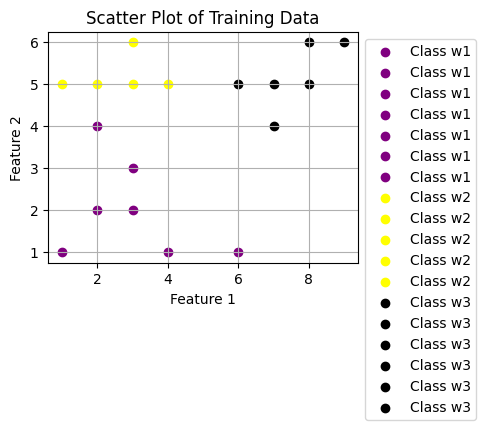

In [ ]:
#3-a
import matplotlib.pyplot as plt

# Training data
w1 = [[1, 1], [2, 2], [2, 4], [3, 2], [3, 3], [4, 1], [6, 1]]
w2 = [[1, 5], [2, 5], [3, 5], [3, 6], [4, 5]]
w3 = [[6, 5], [7, 4], [7, 5], [8, 5], [8, 6], [9, 6]]

# Merge all data points
data = w1 + w2 + w3
labels = ['Class w1'] * len(w1) + ['Class w2'] * len(w2) + ['Class w3'] * len(w3)

# Creating scatter plot
plt.figure(figsize=(4, 3))
for i, point in enumerate(data):
    plt.scatter(point[0], point[1], color='purple' if labels[i] == 'Class w1' else 'yellow' if labels[i] == 'Class w2' else 'black', label=labels[i])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Training Data')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
#3-b
import numpy as np
from collections import Counter

def euclidean_dist(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

def neighbor_k(training_data, test_point, k=3):
    distances = [(euclidean_dist(test_point, train_point), label)
                 for label, train_points in training_data.items()
                 for train_point in train_points]

    distances.sort(key=lambda x: x[0])
    nearest = [label for _, label in distances[:k]]

    return Counter(nearest).most_common(1)[0][0]

# Organize training data
training_data = {'w1': w1, 'w2': w2, 'w3': w3}

# Choose two test values
test_point = [4, 2]
test_point2 = [7, 2]

# Classify the test points using KNN
classified_class = neighbor_k(training_data, test_point)
print(f"The test point belongs to Class {classified_class}")

classified_class2 = neighbor_k(training_data, test_point2)
print(f"The test point belongs to Class {classified_class2}")


The test point belongs to Class w1
The test point belongs to Class w3


In [ ]:
#3-c
from scipy.stats import multivariate_normal
#Test Point
test_point = [5,0]

def gaussian_params(class_data):
    class_data = np.array(class_data)
    mean = np.mean(class_data, axis=0)
    covariance = np.cov(class_data.T)
    return mean, covariance

def bayes(test_point, class_params):
    class_probs = {}
    for label, params in class_params.items():
        mean, cov = params
        class_probs[label] = multivariate_normal.pdf(test_point, mean=mean, cov=cov)

    return max(class_probs, key=class_probs.get)

# Calculating Gaussian parameters
w1_params = gaussian_params(w1)
w2_params = gaussian_params(w2)
w3_params = gaussian_params(w3)

# Organize Gaussian parameters
class_parameters = {'w1': w1_params, 'w2': w2_params, 'w3': w3_params}

# Classify the test point
class_bayes = bayes(test_point, class_parameters)
print(f"The test point belongs to Class {class_bayes}")


The test point belongs to Class w1
